Algoritmo SGD.

	-Iniciar parámetros random
	-For epochs in range (cantidad de epocs)
	-For 	i in range (cantidad de filas del vector input) -- stocastic
		i in range (1<i<cantidad de filas del vector input) -- mini batch
		i in range (i=cantidad de filas del vector input) -- vanila SGD
			forward propagation
			error = y-y_hat
			backprapagation
			update pesos  --> W=W-lr*Grad(J)
		calcular MSE = 1/n * sum(y-y_hat)^2

𝑦 = − (𝑥 − 2)^2 +3

𝑦' = −2(𝑥 − 2) = 0

Mi función a implementar es y' y el gradiente será y''.

Entonces mi entrada es X y mi salida es Y'=0

In [1]:
import numpy as np
from matplotlib import pyplot as plt

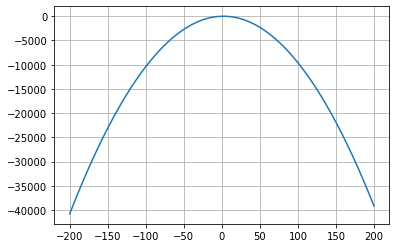

In [2]:
X = np.arange(-200,200,0.05)
Y = -1*np.power((X - 2),2)+3

fig, ax =plt.subplots()
ax.plot(X,Y)
ax.grid()

Inicializo los parámetros

In [3]:
lr = 0.02
min_grad = 0.00000000000001
start = -200
epochs = 3000

Cálculos

In [4]:
x = start
for i in range(epochs):
    y = -(x-2)**2 + 3
    dy_dx = -2*(x-2)
    x = x + lr*dy_dx
    if np.abs(dy_dx) <= min_grad:
        print('El punto próximo a ({},{})'.format(x , -(x-2)**2 + 3), 'tiene pendiente < +- {} y es el máximo de la función'.format(min_grad))
        break

El punto próximo a (1.9999999999999953,3.0) tiene pendiente < +- 1e-14 y es el máximo de la función


2. Mini-Batch Gradient Descent para entrenar un modelo cuadrático

a) Crear un dataset sintético con 10,000 muestras a partir de la siguiente expresión (donde “x” es la feature que toma valores entre 0 y 4, e “y” es la salida):

In [5]:
X = np.linspace(0,4,10000)
Y = - ( X - 2)**2 + 3 + 0.2 + np.sin( 16 * X)

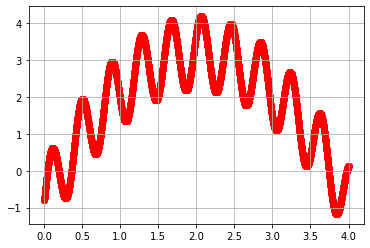

In [6]:
fig, ax =plt.subplots()
ax.scatter(X,Y, color = 'red')
ax.grid()

b) Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación. Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el
ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar la evolución del ECM con el número de epochs.

In [49]:
#Inicializo los parámetros

W1 = float(np.random.rand(1))
W2 = float(np.random.rand(1))
W3 =  float(np.random.rand(1))
lr = 0.01
epochs = 400
batch = 100

In [50]:
loss_historic = []
for e in range(epochs):
    for b in range(0,len(X),batch):
        MSE_cum = 0
        X_minibatch = X[b:b+batch]
        Y_minibatch = Y[b:b+batch]
        long_batch = X_minibatch.shape[0]
        #Fordward
        Y_hat = W1 * np.power(X_minibatch,2) + W2 * X_minibatch + W3
        error = np.subtract(Y_minibatch, Y_hat)
        error.resize(batch,1)
        MSE = np.square(error).mean()
        MSE_cum = MSE_cum + MSE
        #Back
        dMSE_derror = (1/long_batch)*error
        dMSE_derror.resize(batch,1)
        derror_dyhat = -1 
        dyhat_W1 = np.power(X_minibatch,2)
        dyhat_W1.resize(batch,1)
        dyhat_W2 = X_minibatch
        dyhat_W2.resize(batch,1)
        dMSE_W1 = derror_dyhat * dyhat_W1.T @ dMSE_derror
        dMSE_W2 = derror_dyhat * dyhat_W2.T @ dMSE_derror
        dMSE_W3 = derror_dyhat * np.sum(dMSE_derror)
        W1 = W1 - lr * dMSE_W1
        W2 = W2 - lr * dMSE_W2
        W3 = W3 - lr * dMSE_W3
    loss_historic.append(MSE_cum)
print("W1 = ", float(W1))
print("W2 = ", float(W2))
print("W3 = ", W3)    

W1 =  -0.8141189770783033
W2 =  3.421678720441165
W3 =  -0.4812880488207245


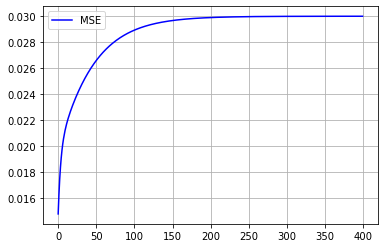

In [51]:
plt.figure(figsize=(6,4))
plt.plot(loss_historic, color='blue', label='MSE')
plt.grid(True)
plt.legend()
plt.show()

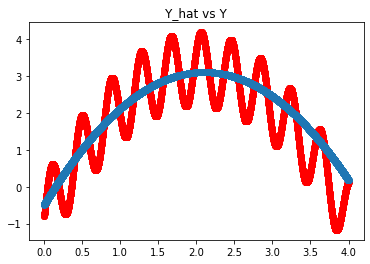

In [58]:
plt.scatter(X, Y, c = 'r')
plt.scatter(X, y_)
plt.title('Y_hat vs Y')
plt.show()